In [1]:
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
path_to_train='Train/'
path_to_test='Test/'
X_train=np.load(path_to_train+"X_train.npy")
Y_train=np.load(path_to_train+"Y_train.npy")
X_test=np.load(path_to_test+"X_test.npy")
Y_test=np.load(path_to_test+"Y_test.npy")

In [ ]:
from imblearn.over_sampling import SMOTE
nm = SMOTE()  
X_train, Y_train = nm.fit_resample(X_train, Y_train)
pd.array(Y_train).value_counts()

In [ ]:
def train(epoch, my_model):
    losses = []
    my_model.train()
    for batch_id, (X_batch, Y_batch) in enumerate(train_loader):
        optimizer.zero_grad() 
        output = my_model(X_batch)
        loss = loss_function(output, Y_batch)
        loss.backward()
        optimizer.step()
        if batch_id % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_id * len(X_batch), len(train_loader.dataset),
                100. * batch_id / len(train_loader), loss.item()))
        losses.append(loss.data.numpy())
    return np.mean(losses)

In [ ]:
def test(my_model):
    my_model.eval()
    test_loss = 0
    correct = 0
    for X_batch, Y_batch in test_loader: 
        output = my_model(X_batch)
        test_loss += loss_function(output, Y_batch).data
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(Y_batch.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader)
    acc = correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset), 100 * correct / len(test_loader.dataset)))
    return acc,test_loss

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import TensorDataset, DataLoader

def print_confusion_matrix(model, X, Y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(Y, y_pred))
    accurancy = accurancy_score(Y, y_pred)
    print(f"Accurancy = {accurancy}")
    return accurancy

batch_size = 64
input_shape = X_train.shape[1]

X_train=X_train.reshape(X_train.shape[0],1,12000)
X_test=X_test.reshape(X_test.shape[0],1,12000)

X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.LongTensor(Y_train)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.LongTensor(Y_test)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
input_shape = X_train.shape[1]

In [30]:
model1 = nn.Sequential()
model1.add_module("conv1",nn.Conv1d(in_channels = 1, out_channels = 16, kernel_size = 3))
model1.add_module("relu1",nn.ReLU())
model1.add_module("flattern", nn.Flatten())
model1.add_module("dense1",nn.Linear((input_shape-3+1)*16,264))
model1.add_module("relu2",nn.ReLU())
model1.add_module("AvgPool", nn.AvgPool1d(2))
model1.add_module("relu2",nn.ReLU())
model1.add_module("bn1",nn.BatchNorm1d(132))
model1.add_module("drop1", nn.Dropout(0.5))
model1.add_module("relu3",nn.ReLU())
model1.add_module("dense2",nn.Linear(132,132))
model1.add_module("drop2", nn.Dropout(0.5))
model1.add_module("relu4",nn.ReLU())
model1.add_module("dense3", nn.Linear(132,5))
model1.add_module("softmax",nn.Softmax(dim=1))

loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.0001)

In [31]:
loss_train_th=[]
loss_test_th=[]
acc_th=[]
for epoch in range(25):
    loss_train_th.append(train(epoch + 1,model1))
    acc_,test_loss_=test(model1)
    acc_th.append(acc_)
    loss_test_th.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.614137
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.539839
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.504548
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.400743
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.411851
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.352925
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.322203

Test set: Average loss: 1.5675, Accuracy: 644/2163 (29.77%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.294091
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.297750
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.238937
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.217973
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.304826
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.182890
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.238410

Test set: Average loss: 1.4533, Accuracy: 1000/2163 (46.23%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.193746
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.163397
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.206703
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.

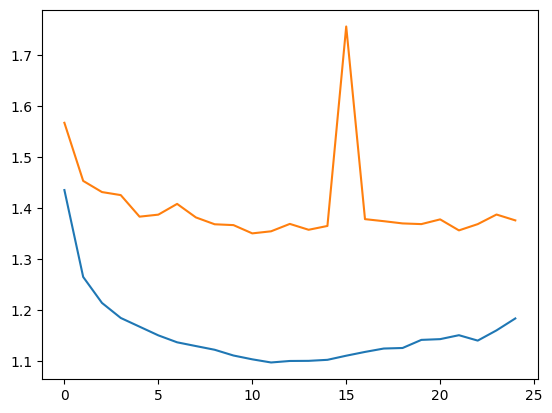

In [34]:
plt.plot(loss_train_th)
plt.plot(loss_test_th)
plt.show()

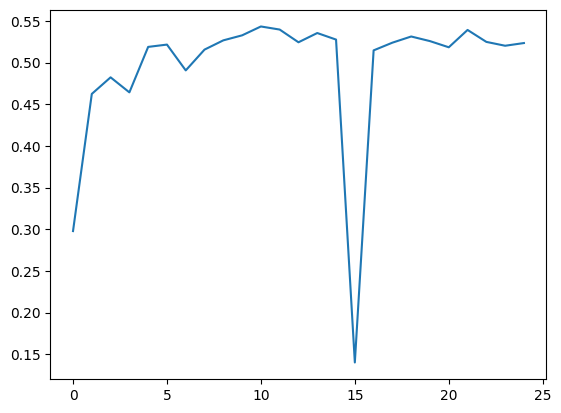

In [36]:
plt.plot(acc_th)
plt.show()

In [39]:
print('Acc: ', np.max(acc_th), 'Epoch: ', np.argmax(acc_th))

Acc:  0.543227 Epoch:  10


In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import TensorDataset, DataLoader

def print_confusion_matrix(model, X, Y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(Y, y_pred))
    accurancy = accurancy_score(Y, y_pred)
    print(f"Accurancy = {accurancy}")
    return accurancy

batch_size = 64
input_shape = X_train.shape[1]

X_train=X_train.reshape(X_train.shape[0],1,12000)
X_test=X_test.reshape(X_test.shape[0],1,12000)

X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.LongTensor(Y_train)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.LongTensor(Y_test)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [20]:
model2=nn.Sequential()
model2.add_module("conv1",nn.Conv1d(in_channels = 1, out_channels = 16, kernel_size = 101))
model2.add_module("relu1",nn.ReLU())
model2.add_module("conv2",nn.Conv1d(in_channels = 16, out_channels = 16, kernel_size = 215))
model2.add_module("relu2",nn.ReLU())
model2.add_module("flatten",nn.Flatten())
model2.add_module("dense1",nn.Linear((input_shape-101-215+2)*16,132))
model2.add_module("bn2",nn.BatchNorm1d(132))
model2.add_module("drop1", nn.Dropout(0.5))
model2.add_module("relu6",nn.ReLU())
model2.add_module("dense2",nn.Linear(132,132))
model2.add_module("drop2", nn.Dropout(0.5))
model2.add_module("relu7",nn.ReLU())
model2.add_module("dense3", nn.Linear(132,5))
model2.add_module("softmax",nn.Softmax(dim=1))

In [21]:
loss_train_th=[]
loss_test_th=[]
acc_th=[]
for epoch in range(10):
    loss_train_th.append(train(epoch + 1,model2))
    acc_,test_loss_=test(model2)
    acc_th.append(acc_)
    loss_test_th.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.607306
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.615990
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.610599
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.605018
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.602673
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.623705
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.600007

Test set: Average loss: 1.6134, Accuracy: 330/2163 (15.26%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.620837
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.614338
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.612190
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.608403
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.623574
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.613921
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.604531

Test set: Average loss: 1.6135, Accuracy: 327/2163 (15.12%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.608876
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.610956
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.605143
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.6

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score
from torch.utils.data import TensorDataset, DataLoader

def print_confusion_matrix(model, X, Y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(Y, y_pred))
    accurancy = accurancy_score(Y, y_pred)
    print(f"Accurancy = {accurancy}")
    return accurancy

batch_size = 64
input_shape = X_train.shape[1]

X_train=X_train.reshape(X_train.shape[0],1,input_shape)
X_test=X_test.reshape(X_test.shape[0],1,input_shape)

X_train_tensor = torch.Tensor(X_train)
Y_train_tensor = torch.LongTensor(Y_train)

train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test)
Y_test_tensor = torch.LongTensor(Y_test)

test_dataset = TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [163]:
from torch.autograd import Variable 
model3 = nn.Sequential()

class myLSTM(nn.Module): 
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(myLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1 =  nn.Linear(128, 128) 
        self.fc = nn.Linear(128, num_classes) 
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.gap = nn.AvgPool1d(num_layers)
    
    def forward(self, x): 
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) 
        hn = hn.view(x.size(0), -1, self.hidden_size) 
        out = self.flatten(hn)
        out = self.gap(out)
        out = self.relu(out)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out) 
        return out

model3.add_module('LSTM', myLSTM(5,input_shape,128,2))
model3.add_module('softmax', nn.Softmax(dim=1))

loss_function=nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=0.0001)

In [164]:
loss_train_th=[]
loss_test_th=[]
acc_th=[]
for epoch in range(25):
    loss_train_th.append(train(epoch + 1,model3))
    acc_,test_loss_=test(model3)
    acc_th.append(acc_)
    loss_test_th.append(test_loss_)

Train Epoch: 1 [0/42820 (0%)]	Loss: 1.610082
Train Epoch: 1 [6400/42820 (15%)]	Loss: 1.609563
Train Epoch: 1 [12800/42820 (30%)]	Loss: 1.610214
Train Epoch: 1 [19200/42820 (45%)]	Loss: 1.609403
Train Epoch: 1 [25600/42820 (60%)]	Loss: 1.609812
Train Epoch: 1 [32000/42820 (75%)]	Loss: 1.609244
Train Epoch: 1 [38400/42820 (90%)]	Loss: 1.609396

Test set: Average loss: 1.6081, Accuracy: 829/2163 (38.33%)

Train Epoch: 2 [0/42820 (0%)]	Loss: 1.609343
Train Epoch: 2 [6400/42820 (15%)]	Loss: 1.609006
Train Epoch: 2 [12800/42820 (30%)]	Loss: 1.609027
Train Epoch: 2 [19200/42820 (45%)]	Loss: 1.608879
Train Epoch: 2 [25600/42820 (60%)]	Loss: 1.609449
Train Epoch: 2 [32000/42820 (75%)]	Loss: 1.609453
Train Epoch: 2 [38400/42820 (90%)]	Loss: 1.609576

Test set: Average loss: 1.6083, Accuracy: 748/2163 (34.58%)

Train Epoch: 3 [0/42820 (0%)]	Loss: 1.609496
Train Epoch: 3 [6400/42820 (15%)]	Loss: 1.610510
Train Epoch: 3 [12800/42820 (30%)]	Loss: 1.609954
Train Epoch: 3 [19200/42820 (45%)]	Loss: 1.6

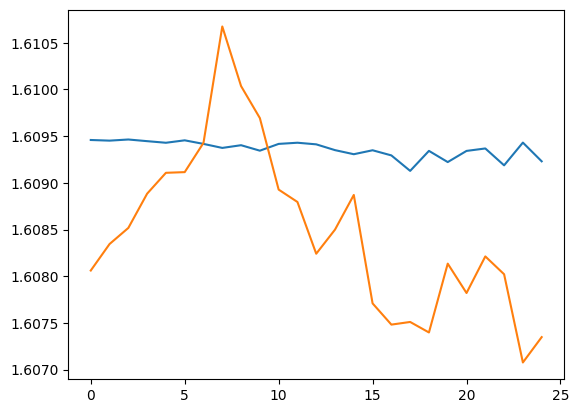

In [165]:
plt.plot(loss_train_th)
plt.plot(loss_test_th)
plt.show()

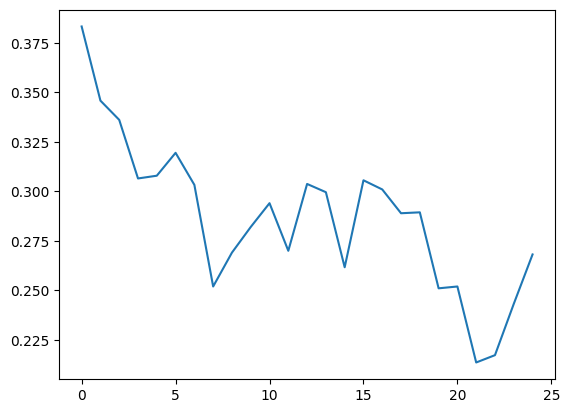

In [166]:
plt.plot(acc_th)
plt.show()

In [167]:
print('Acc: ', np.max(acc_th), 'Epoch: ', np.argmax(acc_th))

Acc:  0.38326398 Epoch:  0
